In [1]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   - -------------------------------------- 10.5/390.3 MB 59.4 MB/s eta 0:00:07
   - -------------------------------------- 17.6/390.3 MB 44.2 MB/s eta 0:00:09
   -- ------------------------------------- 25.7/390.3 MB 42.8 MB/s eta 0:00:09
   --- ------------------------------------ 34.3/390.3 MB 41.9 MB/s eta 0:00:09
   ---- ----------------------------------- 41.9/390.3 MB 41.0 MB/s eta 0:00:09
   ----- ---------------------------------- 52.4/390.3 MB 42.2 MB/s eta 0:00:08
   ------ --------------------------------- 62.9/390.3 MB 43.6 MB/s eta 0:00:08
   ------- -------------------------------- 74.4/390.3 MB 45.2 MB/s eta 0:00:07
   -------- ------------------------------- 86.8/390.3 MB 46.9 MB/s eta 0:00:07
   ---------- ---------------------------- 100.4/390.3 MB 48.5 MB/s eta 0:00:06
   ----------- --------------------------- 113.5/390.3 MB 50.3 MB/s eta 0:00:06
   ------------ -------------------------- 127.9/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
data=pd.read_csv("predict_energy_consumption.csv")
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [8]:
x=data[["temperature","humidity","wind_speed","solar_irradiance"]].values
y=data["energy_consumption"].values

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [21]:
model = Sequential((
Dense(64, activation = 'relu', input_shape=(X_train.shape[1],)),
Dense (32, activation = 'relu'), 
Dense (1) 
))

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [23]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 90978.4766 - mae: 273.8468 - val_loss: 83726.2188 - val_mae: 259.0612
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 92279.7734 - mae: 275.2418 - val_loss: 83188.1250 - val_mae: 258.0091
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90994.3125 - mae: 273.0042 - val_loss: 82268.4531 - val_mae: 256.1970
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84530.0469 - mae: 261.3516 - val_loss: 80786.1094 - val_mae: 253.2494
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84401.4844 - mae: 260.3831 - val_loss: 78525.8125 - val_mae: 248.6911
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82904.9062 - mae: 256.9216 - val_loss: 75311.3516 - val_mae: 242.0572
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84503.2578 - mae: 259.8690 - val_loss: 70959.1562 - val_mae: 232.7586
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77850.2266 - mae: 246.0809 - val_loss: 65457.

In [24]:
test_loss,test_mae = model.evaluate(X_test, y_test,verbose=1)
print(f"test mean absolute error: {test_mae:2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18007.6426 - mae: 114.9734  
test mean absolute error: 115.266006


In [25]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[289.31595],
       [249.38193],
       [253.97653],
       [212.10785],
       [352.77103],
       [315.6934 ],
       [308.94272],
       [291.83902],
       [295.4667 ],
       [279.65665],
       [240.58995],
       [258.08386],
       [278.43613],
       [239.047  ],
       [307.1783 ],
       [318.9431 ],
       [258.81134],
       [319.01205],
       [299.872  ],
       [244.68643],
       [268.0556 ],
       [278.0272 ],
       [280.26535],
       [275.5942 ],
       [250.55035],
       [246.7023 ],
       [260.8388 ],
       [309.79416],
       [314.512  ],
       [275.75015],
       [236.07869],
       [312.30643],
       [292.8337 ],
       [268.6028 ],
       [313.50854],
       [296.30084],
       [218.1711 ],
       [262.3831 ],
       [285.61612],
       [234.94168],
       [252.44736],
       [246.90775],
       [255.80753],
       [262.34525],
       [270.566  ],
       [260.3066 ],
       [259.62354],
       [256.37704],
       [295.46167],
       [285.16025],


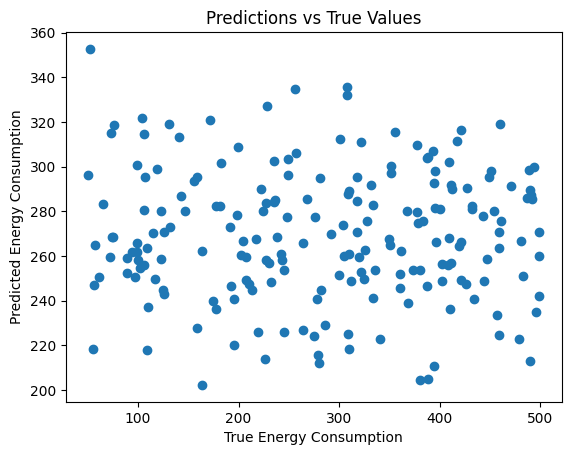

In [26]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()